# 1. Data Basic Information

In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import seaborn as sns 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import decomposition
from sklearn.tree import DecisionTreeClassifier
import random
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import missingno as msno
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.utils import resample
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier



In [2]:
df = pd.read_csv("./data.csv")
df.describe()

,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,sbp_mean,...,bilirubin_indirect_max,bilirubin_indirect_min,urineoutput,sofa_respiration,sofa_coagulation,sofa_liver,sofa_cardiovascular,sofa_cns,sofa_renal,charlson_comorbidity_index
count,36489.000000,36417.000000,36417.000000,36417.000000,36401.000000,36401.000000,36401.000000,36343.000000,36343.000000,36343.000000,...,1544.000000,1544.000000,35073.000000,7587.000000,36235.000000,18590.000000,36402.000000,36468.000000,36467.000000,36489.000000
mean,65.907162,70.935003,103.109572,84.855578,60.429777,105.484634,79.255689,94.449898,147.691412,119.757827,...,1.855894,1.742163,1914.991284,1.723738,0.481109,0.514094,1.060381,0.915433,0.826501,5.798104
std,16.797498,15.064109,20.682937,15.977454,13.347348,23.346984,11.758700,16.705217,22.855348,17.220898,...,2.293747,2.219434,1266.887914,0.588464,0.825034,0.963752,0.972511,1.050761,1.201510,3.014789
min,18.002527,9.000000,36.000000,28.500000,0.830000,51.000000,42.513889,2.000000,49.000000,40.000000,...,0.100000,0.100000,-14850.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.549252,60.000000,88.000000,73.321429,53.000000,91.000000,70.896552,83.500000,132.000000,107.096464,...,0.500000,0.500000,1050.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000
50%,67.439033,70.000000,101.000000,83.500000,60.000000,102.000000,77.851852,93.000000,146.000000,117.678571,...,1.000000,1.000000,1667.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,6.000000
75%,78.729524,80.000000,115.000000,95.250000,68.000000,115.000000,86.382353,104.000000,161.000000,130.649616,...,2.200000,2.000000,2500.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000
max,102.865603,163.000000,295.000000,174.740741,133.000000,299.000000,151.529412,184.000000,352.000000,206.388889,...,21.200000,21.200000,31016.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,20.000000


In [3]:
print(df['outcome'].value_counts()/len(df))

False    0.963578
True     0.036422
Name: outcome, dtype: float64


Columns with non-missing value percentage less than or equal to 0.5: 15

Columns with non-missing value percentage less than 1: 41



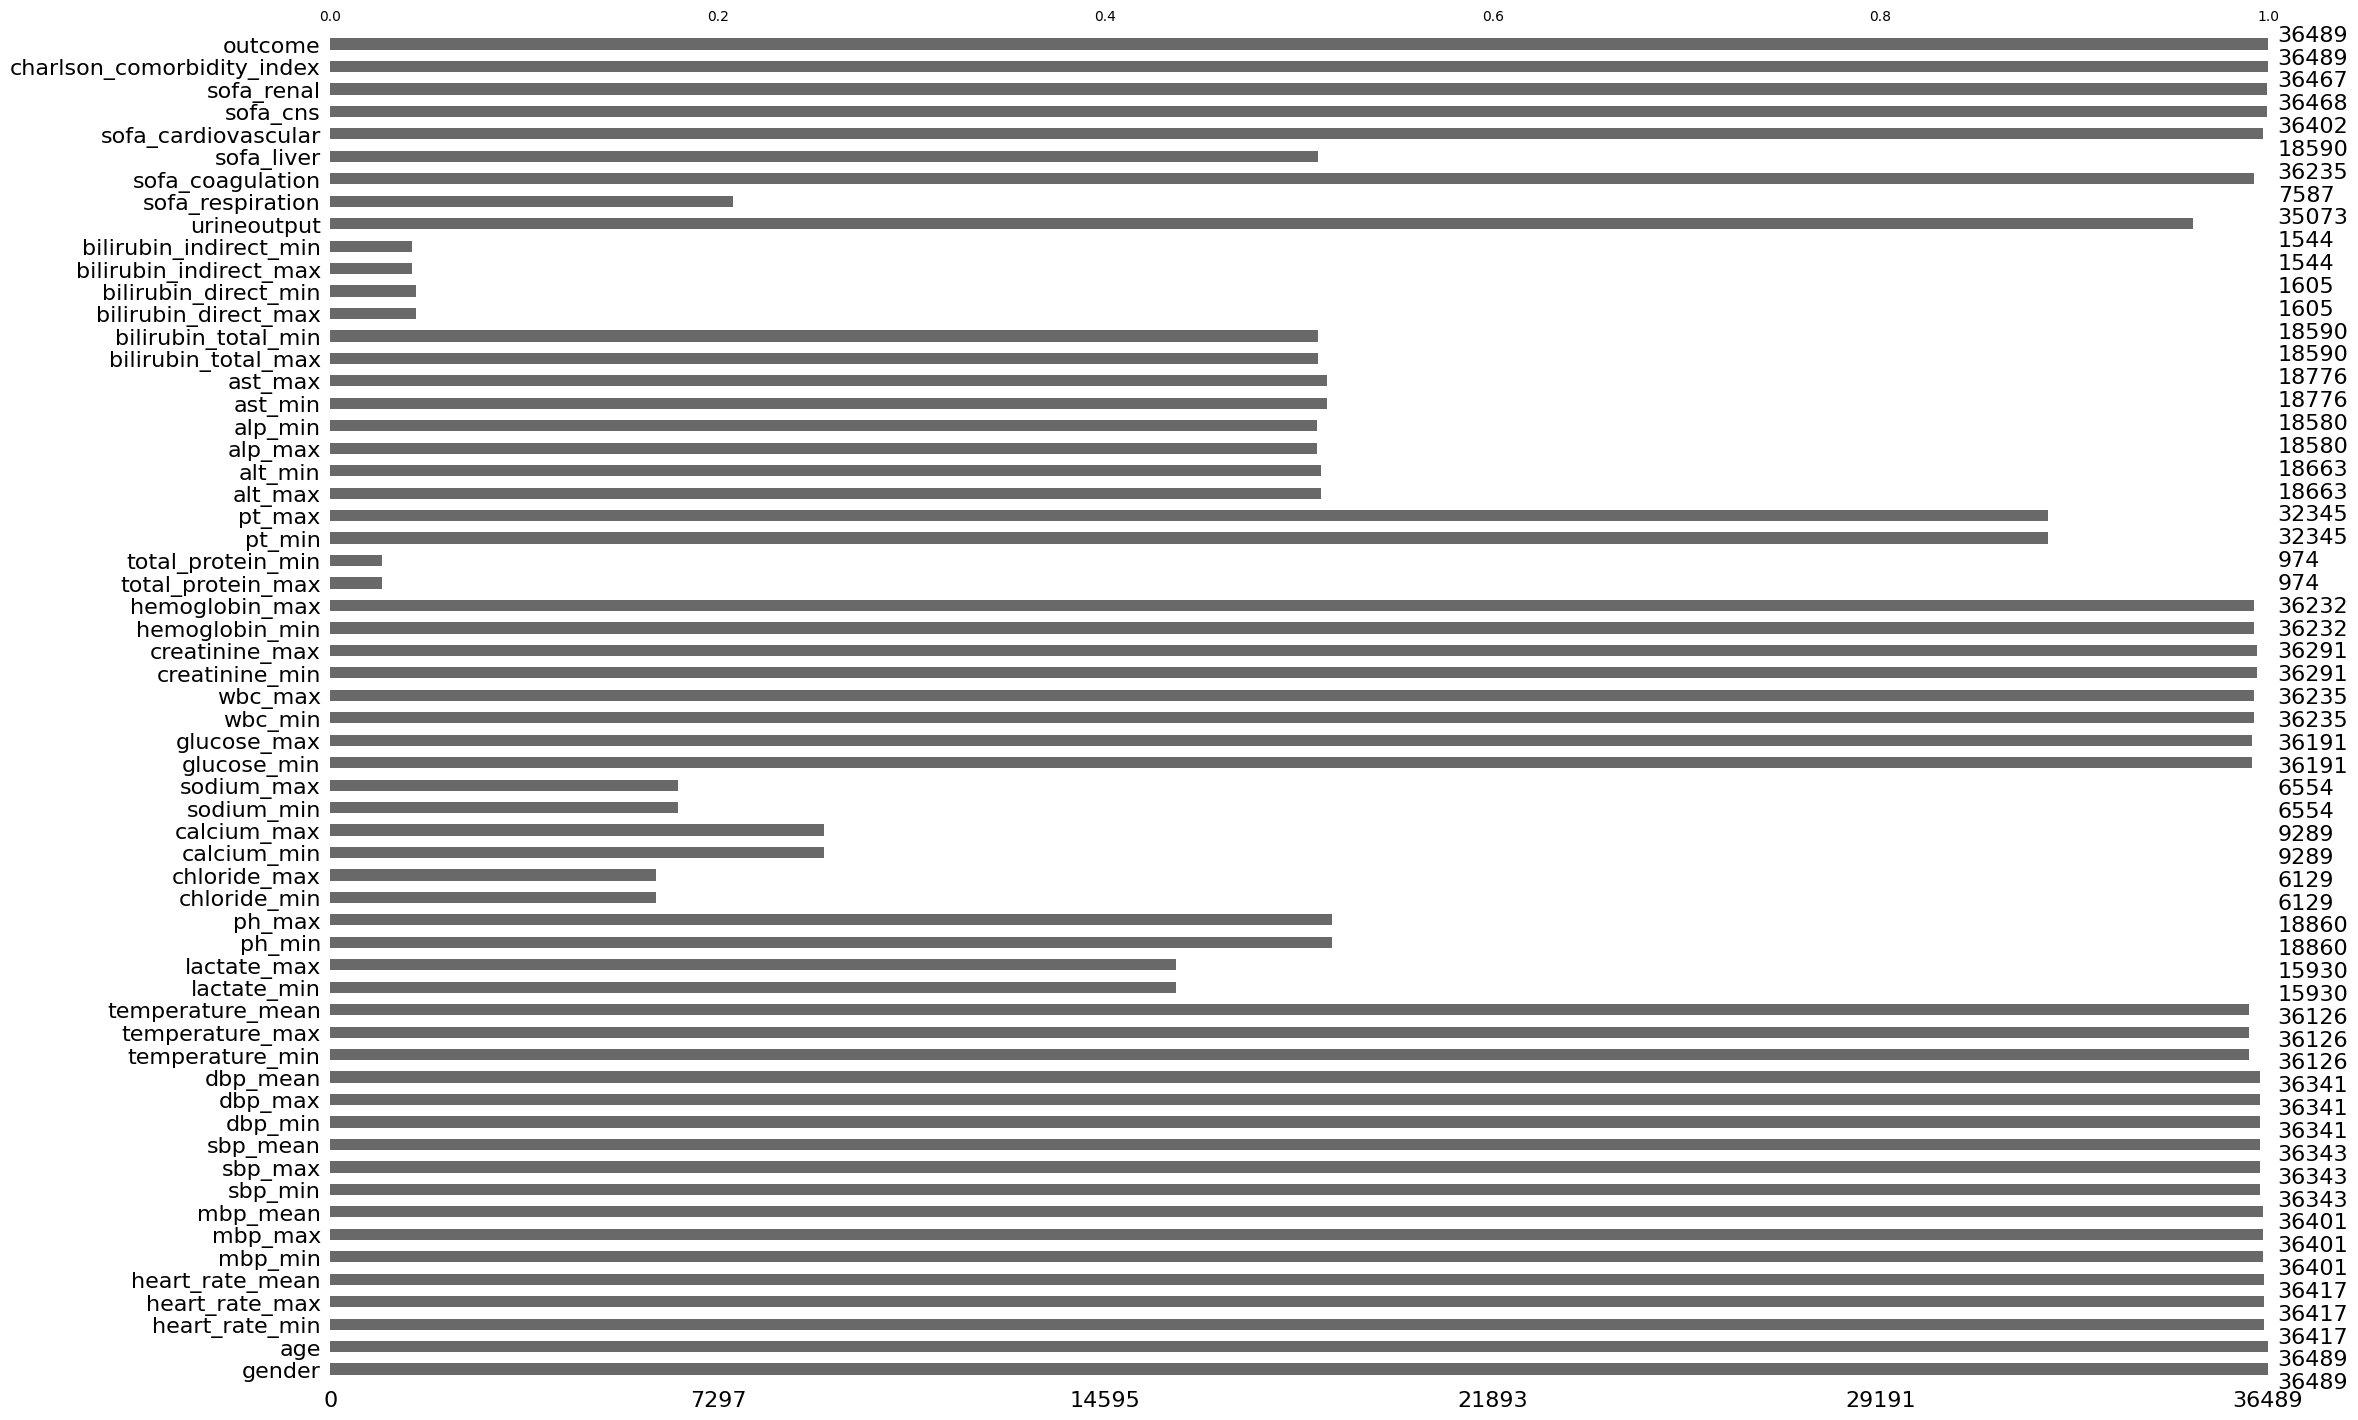

In [4]:
msno.bar(df)
#msno.matrix(df, labels=True)

# cal non-missing value ratio of every col
non_missing_percentages = df.count() / len(df)

# fill with non-missing value ratio
cols_05 = non_missing_percentages[non_missing_percentages <= 0.5].index.tolist()
cols_10 = non_missing_percentages[(non_missing_percentages > 0.5) & (non_missing_percentages < 1)].index.tolist()

print(f"Columns with non-missing value percentage less than or equal to 0.5: {len(cols_05)}\n")
print(f"Columns with non-missing value percentage less than 1: {len(cols_10)}\n")


# 2. Data Preprocessing
## 2.1 Data Standarzation


In [5]:
# change gender to int
df['gender'] = df['gender'].map({"M": 0, "F": 1}).astype(int)
# change outcome to int
df['outcome'] = df['outcome'].map({False: 0 , True: 1}).astype(int)

## 2.2 Missing data
1. if non-missing value percentage is less than 0.5, then delete the column.
2. Otherwise use the average of other non-missing rows to fill the value.

In [6]:
# the non-missing value ratio < 0.5: drop the columns
df.drop(columns=cols_05, inplace=True)
# the non-missing value ratio >= 0.5: fill with mode value
df_filled = df.fillna({col: x for col, x in zip(df.columns, df.mode(dropna=True).iloc[0])})
df_filled.describe()

,gender,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,...,bilirubin_total_max,bilirubin_total_min,urineoutput,sofa_coagulation,sofa_liver,sofa_cardiovascular,sofa_cns,sofa_renal,charlson_comorbidity_index,outcome
count,36489.000000,36489.000000,36489.000000,36489.000000,36489.000000,36489.000000,36489.000000,36489.000000,36489.000000,36489.000000,...,36489.000000,36489.000000,36489.000000,36489.00000,36489.000000,36489.000000,36489.000000,36489.000000,36489.000000,36489.000000
mean,0.455178,65.907162,70.913426,103.079758,84.851917,60.428741,105.464172,79.243014,94.432093,147.660637,...,1.016282,0.909137,1879.483935,0.47776,0.261915,1.060237,0.914906,0.826002,5.798104,0.036422
std,0.497994,16.797498,15.057061,20.673397,15.961895,13.331260,23.322527,11.747341,16.674128,22.814744,...,3.009380,2.715898,1254.570887,0.82313,0.734331,0.971356,1.050688,1.201319,3.014789,0.187340
min,0.000000,18.002527,9.000000,36.000000,28.500000,0.830000,51.000000,42.513889,2.000000,49.000000,...,0.100000,0.100000,-14850.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,55.549252,60.000000,88.000000,73.347826,53.000000,91.000000,70.916667,84.000000,132.000000,...,0.300000,0.300000,1000.000000,0.00000,0.000000,1.000000,0.000000,0.000000,4.000000,0.000000
50%,0.000000,67.439033,70.000000,101.000000,83.458333,60.000000,102.000000,77.821429,93.000000,145.000000,...,0.300000,0.300000,1615.000000,0.00000,0.000000,1.000000,1.000000,0.000000,6.000000,0.000000
75%,1.000000,78.729524,80.000000,115.000000,95.230769,68.000000,115.000000,86.360000,104.000000,161.000000,...,0.700000,0.600000,2450.000000,1.00000,0.000000,1.000000,1.000000,1.000000,8.000000,0.000000
max,1.000000,102.865603,163.000000,295.000000,174.740741,133.000000,299.000000,151.529412,184.000000,352.000000,...,78.000000,67.800000,31016.000000,4.00000,4.000000,4.000000,4.000000,4.000000,20.000000,1.000000


## 2.3 Data Normalization


In [7]:
# every ordinal/numeric column should be normalized
ordinal_fe = df.columns.tolist()
# delete nominal/categorial column
ordinal_fe.remove('gender')
ordinal_fe.remove('outcome')
def data_normalization(df, fe):
    ss = StandardScaler().fit(df[fe])
    df[fe] = ss.transform(df[fe])
    return df
    
df_filled = data_normalization(df_filled, ordinal_fe)


# 3. Feature Engineer
## 3.1 Split dataset

In [8]:

def stratedsplit_dataset(data, target):
    split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
    #test:train == 2:8
    for i, (train_index,test_index) in enumerate(split.split(data,data[target])):
        strat_train_set=data.loc[train_index]
        strat_test_set=data.loc[test_index]

    strat_train_set.reset_index(inplace=True, drop=True)
    strat_test_set.reset_index(inplace=True, drop=True)

    return strat_train_set, strat_test_set

strat_train_set, strat_test_set = stratedsplit_dataset(df_filled, 'outcome')
strat_train_set.head()

,gender,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,...,bilirubin_total_max,bilirubin_total_min,urineoutput,sofa_coagulation,sofa_liver,sofa_cardiovascular,sofa_cns,sofa_renal,charlson_comorbidity_index,outcome
0,0,-1.909904,3.193667,2.221254,2.801291,0.267890,-0.491556,-0.655269,-0.565680,-1.519242,...,0.559498,0.475305,0.004397,-0.580427,2.366928,-0.062015,-0.87078,0.144841,-1.923247,0
1,0,0.775521,0.005750,-0.148974,0.291203,1.993182,1.094915,1.910144,1.473435,0.672353,...,-0.238020,-0.224289,1.291707,-0.580427,-0.356676,-1.091518,-0.87078,-0.687589,0.398672,0
2,0,-0.903010,0.869144,1.253814,0.726722,0.792979,-0.234291,0.307659,-0.025914,-0.291948,...,1.722544,1.911314,-0.860453,1.849356,3.728729,-1.091518,-0.87078,-0.687589,-0.264733,0
3,1,1.022431,-0.326325,-0.922926,-0.728066,-0.557250,0.065853,-0.131722,-0.205836,0.102539,...,-0.238020,-0.224289,0.147874,-0.580427,-0.356676,-0.062015,0.08099,0.977271,1.393781,0
4,0,-0.245834,-0.193495,-0.729438,-0.463008,0.642953,0.537506,0.638121,0.154008,-0.116621,...,-0.238020,-0.224289,-0.832554,-0.580427,-0.356676,-0.062015,-0.87078,-0.687589,0.066970,0


## 3.2 Feature Selection

### 3.2.1 Lasso

In [9]:

def feature_selection_Lasso(df_train, df_test, k):
    df_list = []
    for df_fe in [df_train, df_test]:
        y = df_fe['outcome']
        x = df_fe.drop(columns = 'outcome')
        df_list.append([x, y])


    x_train, y_train = df_list[0]
    x_test, y_test = df_list[1]

    x_train_ros, y_train_ros = RandomOverSampler(random_state=42).fit_resample(x_train, y_train)
    print(y_train_ros.describe())
    lasso = LogisticRegression(solver='saga', random_state=42,penalty='l1', C = 0.01, max_iter=600)
    lasso_clf = lasso.fit(x_train_ros, y_train_ros)

    # Plot feature coef
    table_log = pd.DataFrame()
    table_log['feature'] = x_train.columns
    table_log['coeff'] = abs(lasso_clf.coef_.reshape(-1,1))
    table_log.sort_values('coeff', ascending=False).plot(title = 'Logistic Regression Feature Coef', kind='bar',x='feature',y='coeff', figsize=(10, 5))
    table_log.sort_values('coeff', ascending=False)[:k].plot(title = f'Logistic Regression Feature Coef [:{k}]', kind='bar',x='feature',y='coeff', figsize=(10, 5))

    # preserve all none-zero features
    select_features_l1 = table_log.loc[table_log.coeff <= 0.15,'feature'].tolist()
    
    # # topk features                            
    select_features_l1 = (table_log.sort_values('coeff', ascending=False)[:k]['feature']).to_list()       
    x_train_l1 = x_train[select_features_l1]
    x_test_l1 = x_test[select_features_l1]

    return [x_train_l1, y_train, x_test_l1, y_test]

count    56256.000000
mean         0.500000
std          0.500004
min          0.000000
25%          0.000000
50%          0.500000
75%          1.000000
max          1.000000
Name: outcome, dtype: float64


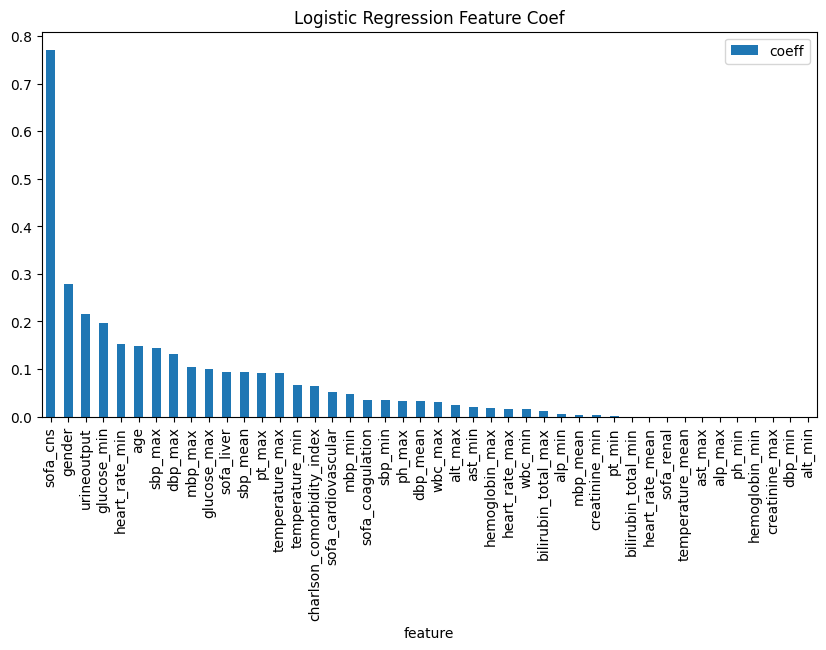

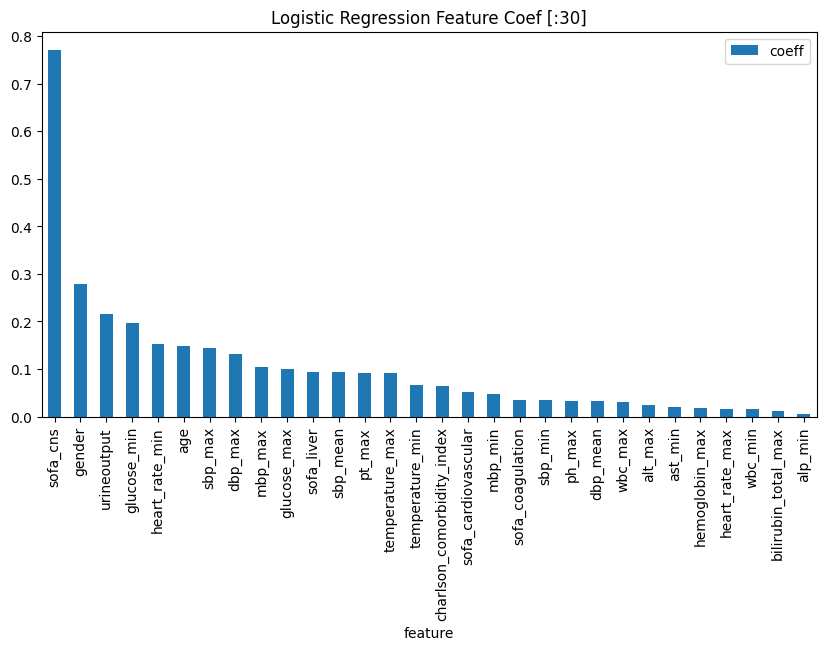

In [10]:
# select top 30 feature 
x_train_l1, y_train, x_test_l1, y_test = feature_selection_Lasso(strat_train_set, strat_test_set, 30)

### 3.2.2 PCA


In [11]:
pca = PCA()
y_train_pca = strat_train_set['outcome']
strat_train_set.drop('outcome', axis=1)
pca.fit(strat_train_set)
thre = 0.02
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_ > thre))

pca_small = PCA(n_components = sum(pca.explained_variance_ratio_ > thre))
pca_small.fit(strat_train_set)
x_train_pca = pd.DataFrame(pca_small.transform(strat_train_set))
y_test_pca = strat_test_set['outcome']
strat_test_set.drop('outcome', axis=1)
x_test_pca = pd.DataFrame(pca_small.transform(strat_test_set))

[0.14930327 0.09487902 0.07703312 0.06819793 0.05781155 0.04736059
 0.04506137 0.04313458 0.03947252 0.03685953 0.03258783 0.03173151
 0.03091809 0.02666702 0.02250301 0.02017543 0.01918891 0.01712711
 0.01408299 0.01361433 0.01335514 0.0103236  0.00924379 0.00839961
 0.00798324 0.00719554 0.00676915 0.00628007 0.0061646  0.00553214
 0.00511343 0.00495162 0.00351011 0.00328593 0.00309556 0.00198488
 0.00185586 0.00161638 0.00146517 0.00125801 0.0010419  0.00077186
 0.00048902 0.00041335 0.00019033]
16


## 3.3 Imbalanced data

There are mainly three ways to re-balance the imbalaned data:
1. Upsampling the minority ones
2. Downsampling the majority ones
3. Generate Synthesis data using SMOTE

In [12]:
def rebalance(x_train_, y_train_, method):
  X = pd.concat([x_train_, y_train_], axis=1)
  not_imtubation = X[X.outcome == 0]
  imtubation = X[X.outcome == 1]

  if method == "upsample":
    imtubation_upsampled = resample(imtubation,
                                    replace=True,
                                    n_samples=len(not_imtubation),
                                    random_state=42)
    result = pd.concat([not_imtubation, imtubation_upsampled])
  elif method == "downsample":
    not_imtubation_downsampled = resample(not_imtubation,
                                          replace = False,
                                          n_samples = len(imtubation),
                                          random_state=42)
    result = pd.concat([not_imtubation_downsampled, imtubation])
  elif method == "smote":
    return SMOTE().fit_resample(x_train_, y_train_)
  else:
    raise Exception("Method not supported, currently only support [upsample, downsample, smote]")
  y_after = result['outcome']
  x_after = result.drop('outcome', axis=1)
  return x_after, y_after


# 4. Training

Here we create a pipeline for automatic training and test.


In [13]:
def pipeline(x_train, y_train, x_test, y_test, model=LogisticRegression(random_state=42, max_iter=500), datatype='original'):
    clf = model.fit(x_train, y_train)
    # ROC-AUC
    pred_y = clf.predict(x_test)
    fpr, tpr, _ = roc_curve(y_test, pred_y)
    plt.title(f"Data Type: {datatype}, Model Type: {model.__class__.__name__}")
    plt.suptitle('ROC curve: ')
    plt.xlabel('FPR (Precision)')
    plt.ylabel('TPR (Recall)')
    plt.plot(fpr,tpr)
    plt.plot((0,1), ls='dashed',color='black')
    print(classification_report(y_test, pred_y))
    print ("Area under curve (AUC): ", auc(fpr,tpr))
    print(confusion_matrix(y_test, pred_y))
    plt.show()
    return model
def pipeline_multi_set(x_train, y_train, x_test, y_test, model=LogisticRegression(random_state=42, max_iter=500)):
    # found the downsample dataset has the best performance
    pipeline(*rebalance(x_train, y_train, "upsample"), x_test, y_test, model, 'upsample')
    pipeline(*rebalance(x_train, y_train, "downsample"), x_test, y_test, model, 'downsample')
    pipeline(*rebalance(x_train, y_train, "smote"), x_test, y_test, model, 'smote')

## 4.1 Single Model Prediction

https://scikit-learn.org/stable/modules/classes.html#linear-classifiers

### 4.1.1 Logistic Regression

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      7032
           1       1.00      0.00      0.01       266

    accuracy                           0.96      7298
   macro avg       0.98      0.50      0.49      7298
weighted avg       0.97      0.96      0.95      7298

Area under curve (AUC):  0.5018796992481203
[[7032    0]
 [ 265    1]]


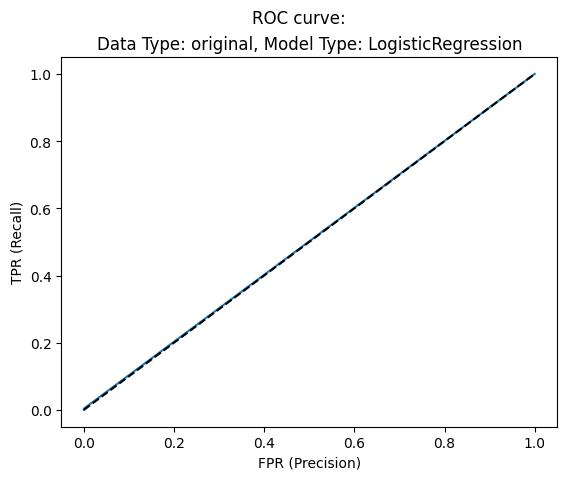

LogisticRegression(max_iter=500, random_state=42)

In [14]:
pipeline(x_train_l1, y_train, x_test_l1, y_test)

              precision    recall  f1-score   support

           0       0.98      0.76      0.86      7032
           1       0.09      0.65      0.16       266

    accuracy                           0.76      7298
   macro avg       0.54      0.71      0.51      7298
weighted avg       0.95      0.76      0.83      7298

Area under curve (AUC):  0.7062317696972807
[[5359 1673]
 [  93  173]]


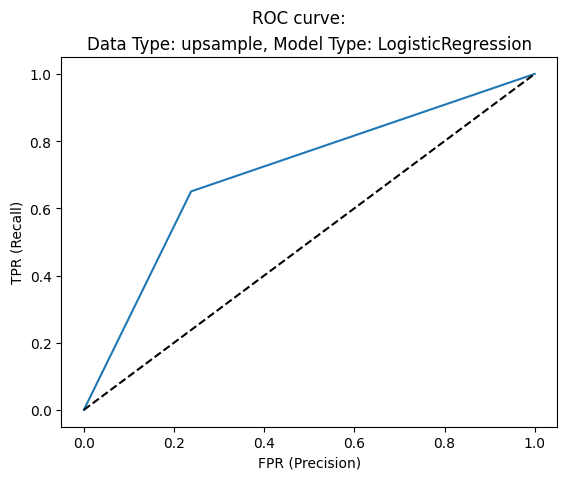

              precision    recall  f1-score   support

           0       0.98      0.75      0.85      7032
           1       0.10      0.70      0.17       266

    accuracy                           0.75      7298
   macro avg       0.54      0.72      0.51      7298
weighted avg       0.95      0.75      0.83      7298

Area under curve (AUC):  0.7229576714824605
[[5277 1755]
 [  81  185]]


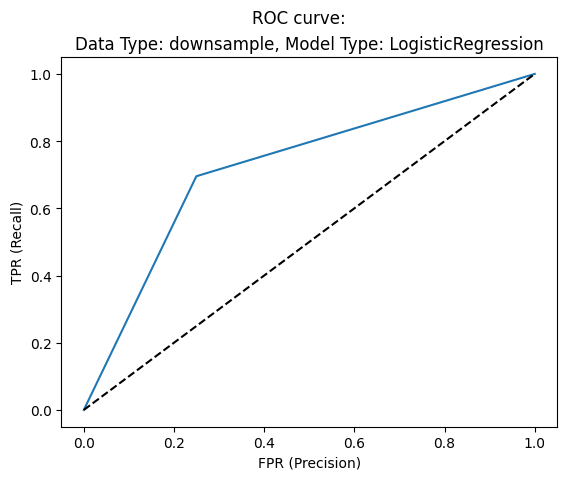

              precision    recall  f1-score   support

           0       0.98      0.75      0.85      7032
           1       0.08      0.61      0.15       266

    accuracy                           0.74      7298
   macro avg       0.53      0.68      0.50      7298
weighted avg       0.95      0.74      0.82      7298

Area under curve (AUC):  0.6761384048859349
[[5253 1779]
 [ 105  161]]


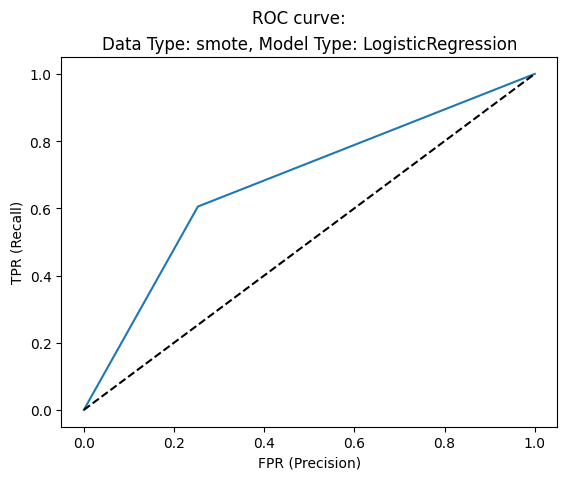

In [15]:
pipeline_multi_set(x_train_l1, y_train, x_test_l1, y_test)

### 4.1.2 SVM

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      7032
           1       0.08      0.27      0.13       266

    accuracy                           0.87      7298
   macro avg       0.53      0.58      0.53      7298
weighted avg       0.94      0.87      0.90      7298

Area under curve (AUC):  0.5779978957632991
[[6252  780]
 [ 195   71]]


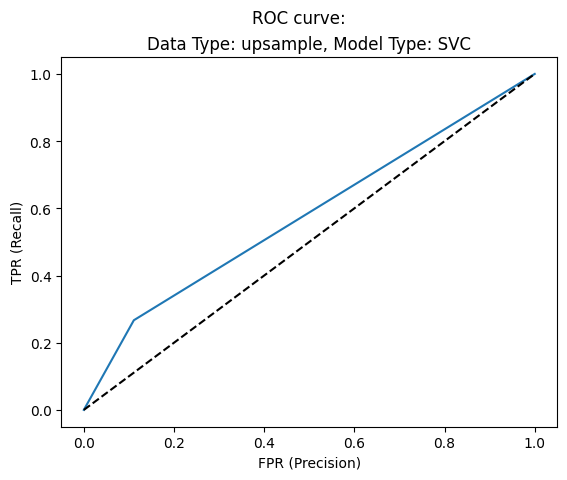

              precision    recall  f1-score   support

           0       0.98      0.70      0.82      7032
           1       0.08      0.68      0.14       266

    accuracy                           0.70      7298
   macro avg       0.53      0.69      0.48      7298
weighted avg       0.95      0.70      0.79      7298

Area under curve (AUC):  0.6886018373578999
[[4926 2106]
 [  86  180]]


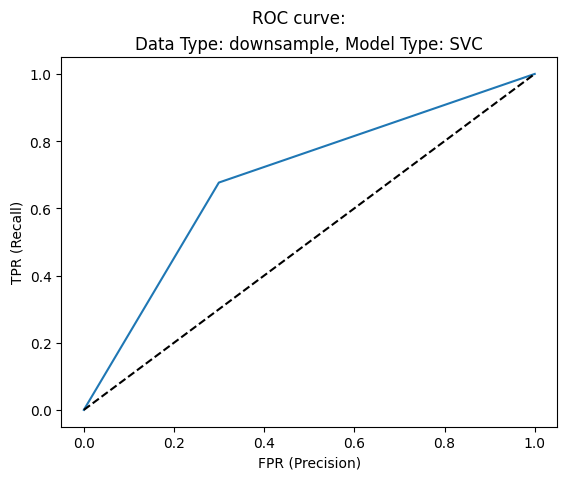

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      7032
           1       0.07      0.24      0.11       266

    accuracy                           0.86      7298
   macro avg       0.52      0.56      0.52      7298
weighted avg       0.94      0.86      0.89      7298

Area under curve (AUC):  0.5593340219148554
[[6201  831]
 [ 203   63]]


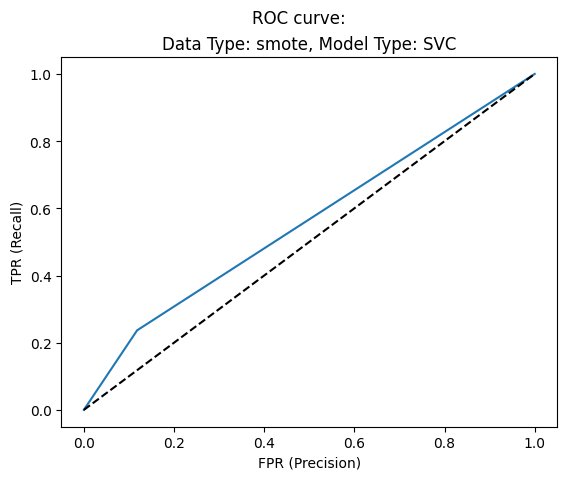

In [16]:
pipeline_multi_set(x_train_l1, y_train, x_test_l1, y_test, model = SVC(C=3))

### 4.1.3 SGD Classifier

              precision    recall  f1-score   support

           0       0.98      0.78      0.87      7032
           1       0.10      0.63      0.17       266

    accuracy                           0.78      7298
   macro avg       0.54      0.70      0.52      7298
weighted avg       0.95      0.78      0.84      7298

Area under curve (AUC):  0.7041970326840994
[[5489 1543]
 [  99  167]]


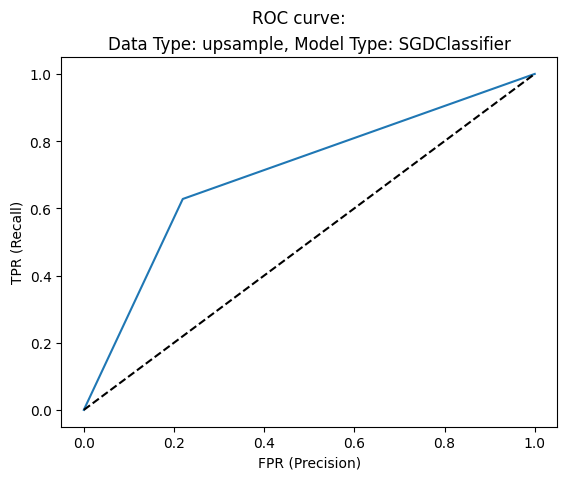

              precision    recall  f1-score   support

           0       0.98      0.78      0.87      7032
           1       0.09      0.60      0.16       266

    accuracy                           0.78      7298
   macro avg       0.54      0.69      0.52      7298
weighted avg       0.95      0.78      0.85      7298

Area under curve (AUC):  0.6905104057071005
[[5508 1524]
 [ 107  159]]


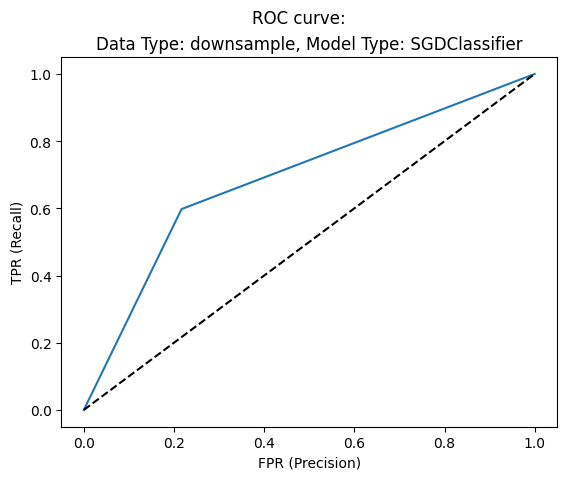

              precision    recall  f1-score   support

           0       0.98      0.75      0.85      7032
           1       0.08      0.61      0.15       266

    accuracy                           0.74      7298
   macro avg       0.53      0.68      0.50      7298
weighted avg       0.95      0.74      0.82      7298

Area under curve (AUC):  0.6811776668634043
[[5271 1761]
 [ 103  163]]


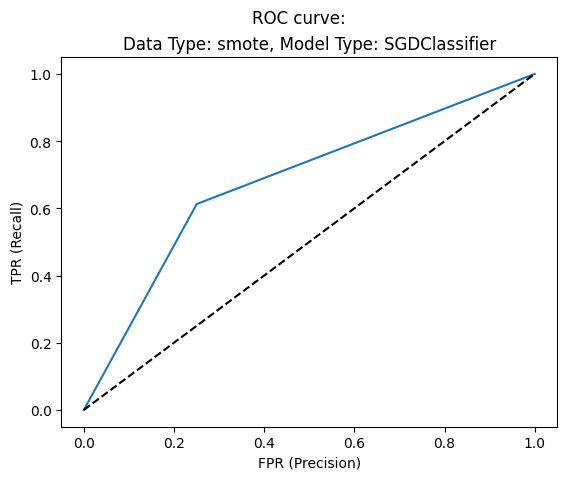

In [17]:
pipeline_multi_set(x_train_l1, y_train, x_test_l1, y_test, 
                   model = SGDClassifier(loss="modified_huber", penalty="l2", alpha=0.01, max_iter=500))

## 4.2 Ensemble Model Prediction

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble

### 4.2.1 Random Forest Classification

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      7032
           1       0.14      0.00      0.01       266

    accuracy                           0.96      7298
   macro avg       0.55      0.50      0.49      7298
weighted avg       0.93      0.96      0.95      7298

Area under curve (AUC):  0.5014530780877107
[[7026    6]
 [ 265    1]]


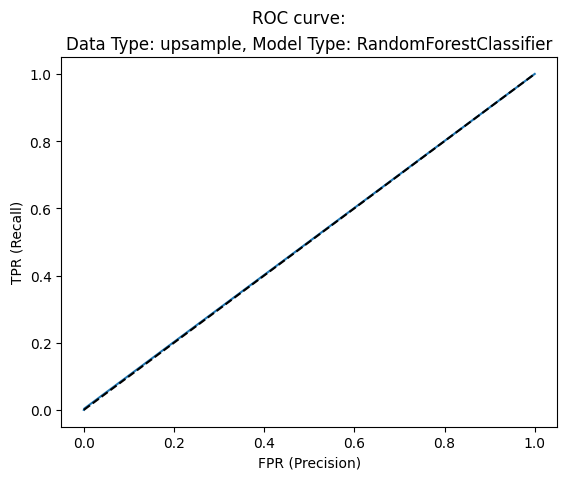

              precision    recall  f1-score   support

           0       0.98      0.69      0.81      7032
           1       0.08      0.70      0.14       266

    accuracy                           0.69      7298
   macro avg       0.53      0.69      0.48      7298
weighted avg       0.95      0.69      0.79      7298

Area under curve (AUC):  0.6939474325746107
[[4869 2163]
 [  81  185]]


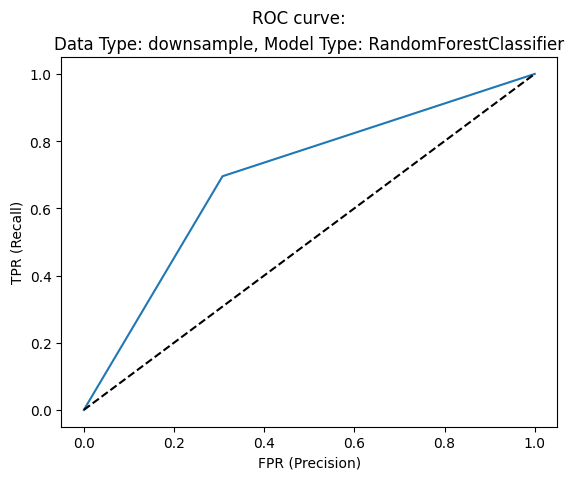

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      7032
           1       0.20      0.09      0.13       266

    accuracy                           0.95      7298
   macro avg       0.59      0.54      0.55      7298
weighted avg       0.94      0.95      0.95      7298

Area under curve (AUC):  0.5400954391097196
[[6935   97]
 [ 241   25]]


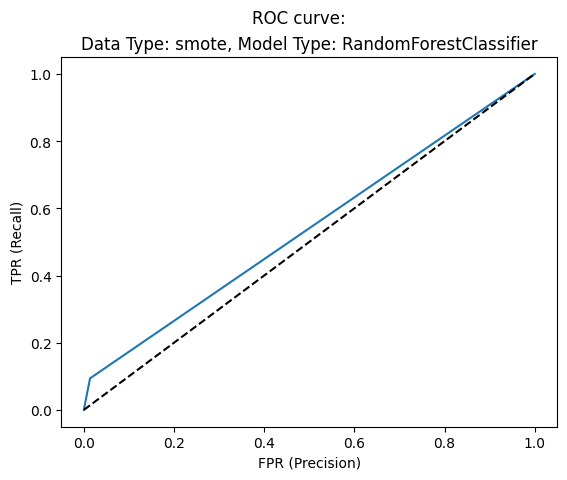

In [18]:
#pipeline(*rebalance(x_train_l1, y_train, "upsample"), x_test_l1, y_test, 
 #        model=RandomForestClassifier(n_estimators=20))
pipeline_multi_set(x_train_l1, y_train, x_test_l1, y_test, 
                   model=RandomForestClassifier(n_estimators=20))


### 4.2.2 Adaboost

              precision    recall  f1-score   support

           0       0.98      0.77      0.86      7032
           1       0.09      0.65      0.16       266

    accuracy                           0.76      7298
   macro avg       0.54      0.71      0.51      7298
weighted avg       0.95      0.76      0.84      7298

Area under curve (AUC):  0.7060585550907987
[[5383 1649]
 [  94  172]]


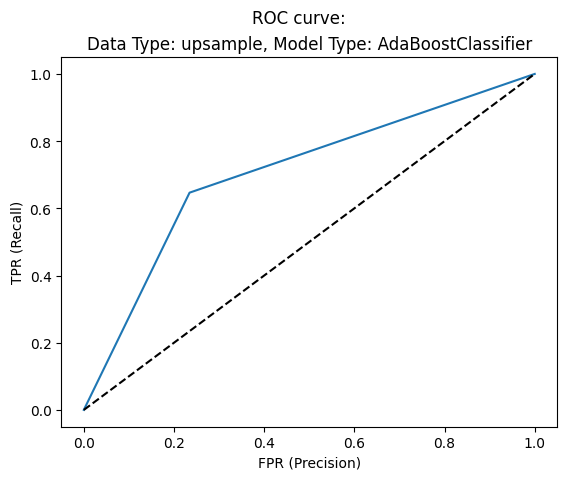

              precision    recall  f1-score   support

           0       0.98      0.75      0.85      7032
           1       0.10      0.68      0.17       266

    accuracy                           0.75      7298
   macro avg       0.54      0.72      0.51      7298
weighted avg       0.95      0.75      0.83      7298

Area under curve (AUC):  0.7195938865936171
[[5309 1723]
 [  84  182]]


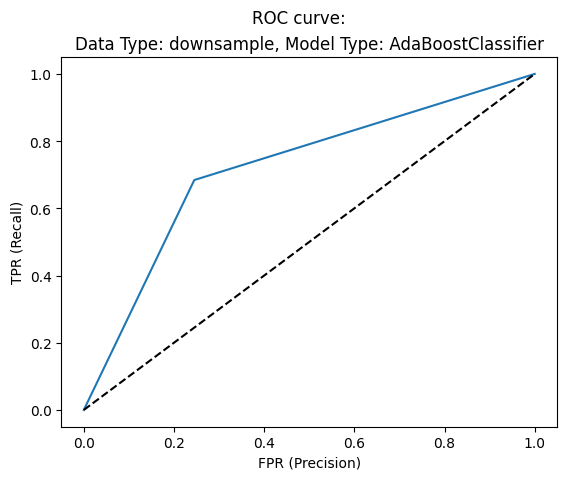

              precision    recall  f1-score   support

           0       0.98      0.76      0.86      7032
           1       0.09      0.61      0.15       266

    accuracy                           0.76      7298
   macro avg       0.53      0.68      0.50      7298
weighted avg       0.95      0.76      0.83      7298

Area under curve (AUC):  0.6829643434524878
[[5349 1683]
 [ 105  161]]


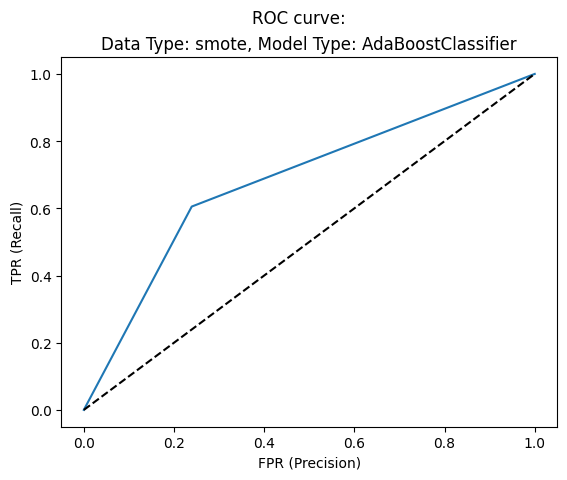

In [19]:
#pipeline(*rebalance(x_train_l1, y_train, "downsample"), x_test_l1, y_test,
 #        model=AdaBoostClassifier(base_estimator=LogisticRegression()))
pipeline_multi_set(x_train_l1, y_train, x_test_l1, y_test, 
                    model=AdaBoostClassifier(base_estimator=LogisticRegression()))

### 4.2.3 Bagging

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7032
           1       0.11      0.46      0.17       266

    accuracy                           0.84      7298
   macro avg       0.54      0.66      0.54      7298
weighted avg       0.94      0.84      0.88      7298

Area under curve (AUC):  0.6564421933673775
[[6007 1025]
 [ 144  122]]


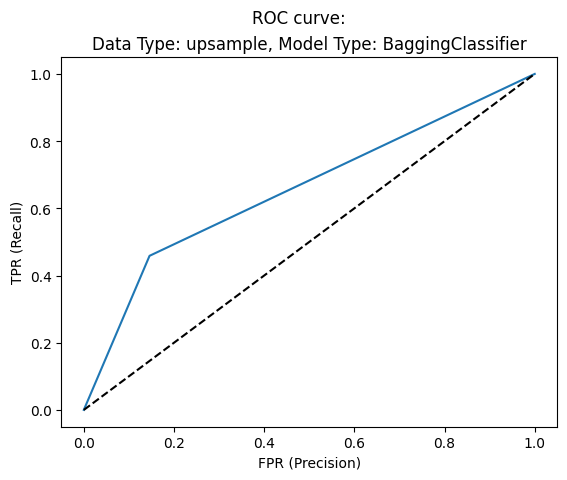

              precision    recall  f1-score   support

           0       0.98      0.79      0.87      7032
           1       0.09      0.53      0.15       266

    accuracy                           0.78      7298
   macro avg       0.53      0.66      0.51      7298
weighted avg       0.95      0.78      0.85      7298

Area under curve (AUC):  0.6621817983525368
[[5559 1473]
 [ 124  142]]


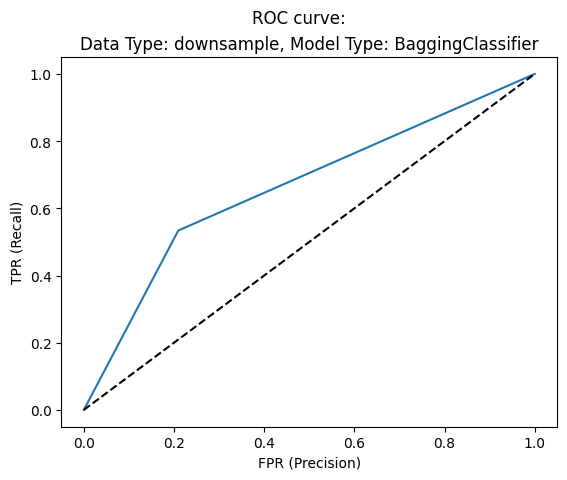

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      7032
           1       0.08      0.36      0.13       266

    accuracy                           0.82      7298
   macro avg       0.53      0.60      0.52      7298
weighted avg       0.94      0.82      0.87      7298

Area under curve (AUC):  0.6023393594908772
[[5907 1125]
 [ 169   97]]


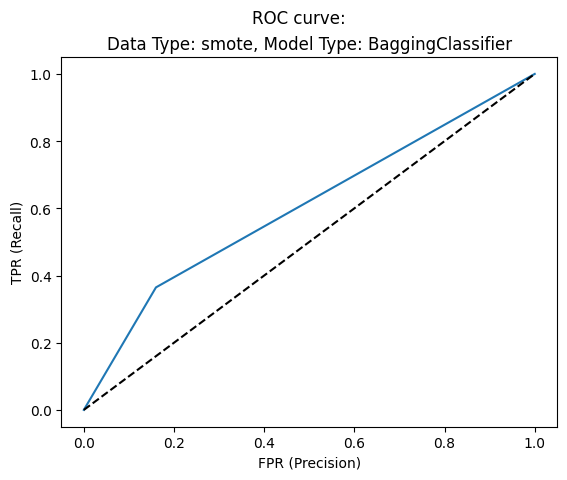

In [20]:
#pipeline(*rebalance(x_train_l1, y_train, "downsample"), x_test_l1, y_test, 
 #        model = BaggingClassifier(SVC(), max_samples=0.5, max_features=0.5))
pipeline_multi_set(x_train_l1, y_train, x_test_l1, y_test, 
                    model = BaggingClassifier(SVC(), max_samples=0.5, max_features=0.5))

### 4.2.4 Gradient Boosting

              precision    recall  f1-score   support

           0       0.98      0.76      0.86      7032
           1       0.09      0.64      0.16       266

    accuracy                           0.76      7298
   macro avg       0.54      0.70      0.51      7298
weighted avg       0.95      0.76      0.83      7298

Area under curve (AUC):  0.7005926719529199
[[5359 1673]
 [  96  170]]


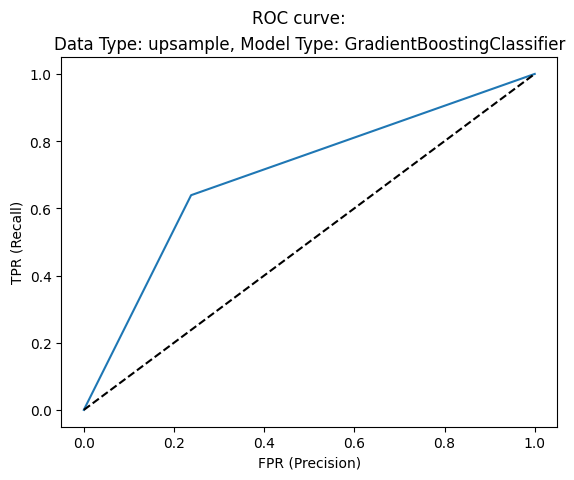

              precision    recall  f1-score   support

           0       0.98      0.71      0.82      7032
           1       0.08      0.67      0.14       266

    accuracy                           0.71      7298
   macro avg       0.53      0.69      0.48      7298
weighted avg       0.95      0.71      0.80      7298

Area under curve (AUC):  0.6915571779277546
[[4994 2038]
 [  87  179]]


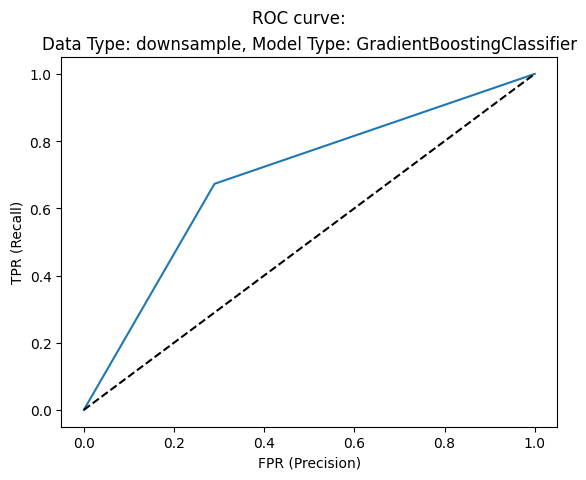

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      7032
           1       0.14      0.30      0.19       266

    accuracy                           0.90      7298
   macro avg       0.55      0.62      0.57      7298
weighted avg       0.94      0.90      0.92      7298

Area under curve (AUC):  0.6154951157757875
[[6515  517]
 [ 185   81]]


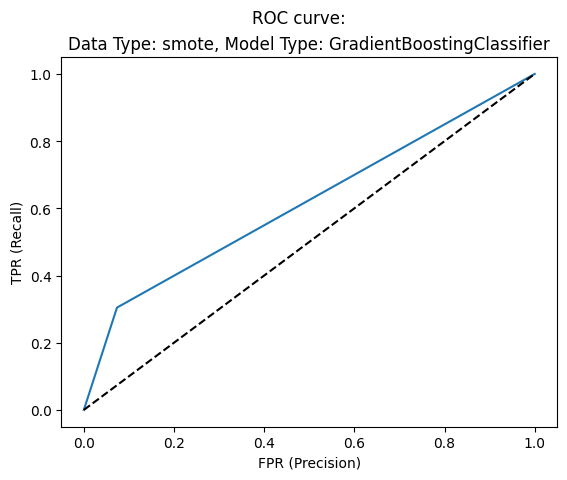

In [21]:
#pipeline(*rebalance(x_train_l1, y_train, "downsample"), x_test_l1, y_test, 
 #        model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0))
pipeline_multi_set(x_train_l1, y_train, x_test_l1, y_test,
                   model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0))